In [1]:
from transformers import AutoModelForSeq2SeqLM
from datasets import load_from_disk
from pprint import pprint
import numpy as np
from dateutil import parser
import matplotlib.pyplot as plt
import sys
import os

/mmfs1/gscratch/ark/knylund/.conda/envs/arkenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
print(set(os.listdir("./lang_splits/")) - set(os.listdir("./lang_models/")))

set()


In [7]:
batch_idxs = np.array_split(np.array(list(range(86))), 4)

for b1_idxs in batch_idxs:
    for b2_idxs in batch_idxs:
        print(b1_idxs, b2_idxs)

#print(np.meshgrid([1, 2, 3, 8], [3, 2, 9, 1]))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] [65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
[22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43] [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
[22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43] [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]
[22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40

In [2]:
pretrained_mt5 = AutoModelForSeq2SeqLM.from_pretrained("google/mt5-small")
pprint(pretrained_mt5.state_dict()["shared.weight"].size()[0])

#pprint(list(pretrained_mt5.state_dict().keys()))
# decoder.block.7.layer.2.DenseReluDense.wi_0.weight
# decoder.block.7.layer.2.DenseReluDense.wi_1.weight
# decoder.block.7.layer.2.DenseReluDense.wo.weight
# encoder.block.7.layer.1.DenseReluDense.wi_0.weight
# encoder.block.7.layer.1.DenseReluDense.wi_1.weight
# encoder.block.7.layer.1.DenseReluDense.wo.weight
# decoder.block.7.layer.1.EncDecAttention.q.weight
# decoder.block.7.layer.1.EncDecAttention.k.weight
# decoder.block.7.layer.1.EncDecAttention.v.weight
# decoder.block.7.layer.1.EncDecAttention.o.weight
# encoder.block.7.layer.0.SelfAttention.q.weight
# encoder.block.7.layer.0.SelfAttention.k.weight
# encoder.block.7.layer.0.SelfAttention.v.weight
# encoder.block.7.layer.0.SelfAttention.o.weight
# shared.weight


250112


In [34]:
data = load_from_disk("./lang_splits/yi")
print(data["train"][0]["meta"])

{'warc_headers': {'warc-record-id': '<urn:uuid:702c26f8-79f3-440e-ac43-5e7e7dc926d5>', 'warc-date': '2022-12-01T06:43:36Z', 'content-type': 'text/plain', 'content-length': 2957, 'warc-type': 'conversion', 'warc-identified-content-language': 'yid', 'warc-refers-to': '<urn:uuid:440356ea-3dbb-48c6-9654-0971cec1c722>', 'warc-target-uri': 'http://yi.loveliking.com/l220-work-light/', 'warc-block-digest': 'sha1:UV3GOA5QBIEFVH34D6KXOCBLKPGEQJ6D'}, 'identification': {'label': 'yi', 'prob': 0.8993659615516663}, 'harmful_pp': 1644.333251953125, 'tlsh': 'tlsh:T1FE43FD5127127ACFAC1BA41DAF4FC02740CB81B2696842669A97CB55D5D9D01E87037310A7CA50F0A6B6E03596628F7DF8FC2FC7F261692003F3DF15125C2DAE8F9F1A3588', 'quality_warnings': ['short_sentences', 'footer'], 'categories': None, 'sentence_identifications': [{'label': 'yi', 'prob': 0.992824912071228}, None, {'label': 'he', 'prob': 0.9986895322799683}, {'label': 'yi', 'prob': 0.9895958304405212}, None, None, None, {'label': 'yi', 'prob': 0.9677118062973022}, 

(array([   0.,    0.,    0.,    0.,    0., 8000.,    0.,    0.,    0.,
           0.]),
 array([2021.5, 2021.6, 2021.7, 2021.8, 2021.9, 2022. , 2022.1, 2022.2,
        2022.3, 2022.4, 2022.5]),
 <BarContainer object of 10 artists>)

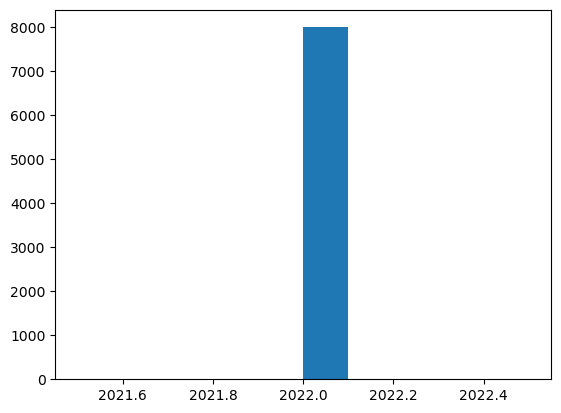

In [37]:
data = load_from_disk("./lang_splits/yi")
dates = []
for i in range(8000):
    dates.append(data["train"][i]["meta"]["warc_headers"]["warc-date"])

years = [parser.parse(d).year for d in dates]

plt.hist(years)